# NLP model building with long short term memory LSTM

Purpose : Building a model able to do a classification on sentences

## 0 - Interesting links

* https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17
* https://www.hackdeploy.com/keras-lstm-example-sequence-binary-classification/
* https://www.youtube.com/watch?v=A9QVYOBjZdY&ab_channel=TensorFlow
* https://www.youtube.com/watch?v=ZMudJXhsUpY&ab_channel=TensorFlow

## 1 - Libraries import

In [136]:
import json
import random
import numpy as np
import pandas as pd
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import CSVLogger

## 2 - Variables definition

In [137]:
nb_train = 7000 # Number of training examples considered
nb_valid = 1500 # Number of validation examples considered
vocab_size = 20000 # Number of words to be considered regarding on their frequency
max_length = 50 # Maximum length of a sentence --> Size of entrance of neural network
embedding_dim = 3 # Embedding dimension for vector representation of words
nb_epochs = 20 # Number of epochs for training
batch_size = 128 # Number of training examples considered in mini batches during training

## 3 - Training JSON file reading

In [138]:
training_examples = []
URL = []
X = [] # sentences
Y = [] # positive or not

for line in open('review_amazon_ordinateurportable02_November_2020.json', 'r'):
    training_examples.append(json.loads(line))

training_examples = training_examples[0]

for item in training_examples:
    X.append(item['review'])    
    Y.append(item['positive'])

## 4 - Training / Test dataset splitting

In [140]:
training_examples = list(zip(X, Y))
random.shuffle(training_examples)
X, Y = zip(*training_examples)
X = list(X)
Y = list(Y)

X_train = X[0:nb_train]
Y_train = Y[0:nb_train]

X_valid = X[nb_train:nb_train + nb_valid]
Y_valid = Y[nb_train:nb_train + nb_valid]

X_test = X[nb_train + nb_valid:]
Y_test = Y[nb_train + nb_valid:]

In [142]:
X_train

['  Very light, and flexible with infinite ways to position,  Weight makes it very portable, but not easy to take along on commute or travel as it is long because of the mouse platform',
 '  I love it works  for school work home,  I love it works  for school work home',
 '  This all started when I bought a NEW Laptop from Amazon and it was really slow and I had to return it, Time to look elsewhere when my money is refunded if ever',
 '  I just got my laptop a few weeks ago and it`s been working slow and blinking really bad I paid too much money for this laptop and I am very mad cause I spent 200 and something on this laptop, I want my money back asap',
 "  I would actually have like to return it but I didn't have access to my phone the GPU and CPU were maxed out as soon as I started the laptop very bad,  I would actually have like to return it but I didn't have access to my phone the GPU and CPU were maxed out as soon as I started the laptop very bad",
 '  Absolute worst laptop I have 

## 5 - Sentences tokenization

In [107]:
tokenizer = Tokenizer(oov_token = "<OOV>", num_words = vocab_size) # Strategy for considering Out Of Vocabulary words
tokenizer.fit_on_texts(X_train) # Only considering words in training examples
word_index = tokenizer.word_index

# Pre-processing training set:
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen = max_length, padding = 'post', truncating = 'post')

# Pre-processing validation set:
X_valid = tokenizer.texts_to_sequences(X_valid)
X_valid = pad_sequences(X_valid, maxlen = max_length, padding = 'post', truncating = 'post')

# Pre-processing test set:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = max_length, padding = 'post', truncating = 'post')

## 6 - Model architecture definition

In [108]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences = True)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [109]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 3)             60000     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 50, 6)             168       
_________________________________________________________________
dense_3 (Dense)              (None, 50, 1)             7         
Total params: 60,175
Trainable params: 60,175
Non-trainable params: 0
_________________________________________________________________


## 7 - Model training

In [110]:
callback_list = []

callback_list.append(EarlyStopping(monitor = 'val_loss', patience = 5, min_delta = 0.0, mode = 'min')) # Callback to ensure parameters update in accordance with test accuracy improvement
callback_list.append(CSVLogger('training_log.csv')) # Callback to get a feedback

In [111]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

history = model.fit(X_train, Y_train, epochs = nb_epochs, batch_size = batch_size, validation_data = (X_valid, Y_valid), verbose = 2, callbacks = callback_list)

Epoch 1/20
55/55 - 2s - loss: 0.6838 - accuracy: 0.5880 - val_loss: 0.6790 - val_accuracy: 0.5807
Epoch 2/20
55/55 - 1s - loss: 0.6685 - accuracy: 0.6010 - val_loss: 0.6742 - val_accuracy: 0.5807
Epoch 3/20
55/55 - 1s - loss: 0.6518 - accuracy: 0.6020 - val_loss: 0.6364 - val_accuracy: 0.5895
Epoch 4/20
55/55 - 1s - loss: 0.5645 - accuracy: 0.7322 - val_loss: 0.5665 - val_accuracy: 0.7482
Epoch 5/20
55/55 - 1s - loss: 0.4944 - accuracy: 0.8138 - val_loss: 0.5420 - val_accuracy: 0.7604
Epoch 6/20
55/55 - 1s - loss: 0.4358 - accuracy: 0.8448 - val_loss: 0.5246 - val_accuracy: 0.7677
Epoch 7/20
55/55 - 1s - loss: 0.3980 - accuracy: 0.8697 - val_loss: 0.5258 - val_accuracy: 0.7639
Epoch 8/20
55/55 - 1s - loss: 0.3657 - accuracy: 0.8837 - val_loss: 0.5204 - val_accuracy: 0.7693
Epoch 9/20
55/55 - 1s - loss: 0.3403 - accuracy: 0.8950 - val_loss: 0.5280 - val_accuracy: 0.7709
Epoch 10/20
55/55 - 1s - loss: 0.3146 - accuracy: 0.9054 - val_loss: 0.5246 - val_accuracy: 0.7699
Epoch 11/20
55/55 -

## 8 - Model training analysis

### 8.1 - Accuracy & Loss plots

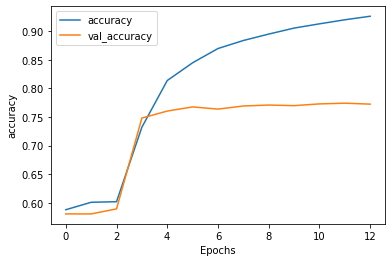

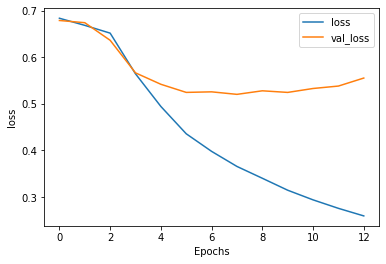

In [112]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### 8.2 - Loading log file information

In [113]:
df_log = pd.read_csv('training_log.csv')
df_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.587997,0.683772,0.580667,0.678960
1,1,0.601000,0.668520,0.580667,0.674216
2,2,0.602003,0.651791,0.589467,0.636438
3,3,0.732223,0.564468,0.748200,0.566533
4,4,0.813780,0.494397,0.760427,0.542018
5,5,0.844811,0.435762,0.767680,0.524597
6,6,0.869731,0.398015,0.763867,0.525795
7,7,0.883740,0.365653,0.769280,0.520400
8,8,0.894986,0.340293,0.770947,0.528017
9,9,0.905434,0.314635,0.769893,0.524567


## 9 - Predictions on test set & new sentences

In [114]:
Y_test_prediction = np.round_(model.predict(X_test)[:,0])
conf_matrix = confusion_matrix(Y_test_prediction, Y_test)

print('CONFUSION MATRIX' + '\n' + '='*20)
print('TRUE POSITIVES : ' + str(conf_matrix[0][0]) + '\nFALSE POSITIVES : ' + str(conf_matrix[0][1]) + '\nFALSE NEGATIVES : ' + str(conf_matrix[1][0]) + '\nTRUE NEGATIVES : ' + str(conf_matrix[1][1]))
print('-'*20 + '\nACCURACY : ' + str(np.round_(100 * (conf_matrix[0][0] + conf_matrix[1][1])/(conf_matrix[0][0] + conf_matrix[1][0] + conf_matrix[0][1] + conf_matrix[1][1]),2)) + ' %')

CONFUSION MATRIX
TRUE POSITIVES : 162
FALSE POSITIVES : 39
FALSE NEGATIVES : 59
TRUE NEGATIVES : 249
--------------------
ACCURACY : 80.75 %


In [115]:
X_train

array([[   3,   39,   41, ...,    0,    0,    0],
       [ 298,    9,   12, ...,    0,    0,    0],
       [   8,   30, 1442, ...,    0,    0,    0],
       ...,
       [ 628,    7,    2, ...,    0,    0,    0],
       [  21,   39,    4, ...,    0,    0,    0],
       [ 172,   13,    3, ...,    0,    0,    0]])

In [147]:
sentences = ["sooo bad", "awesome"]
sequence = tokenizer.texts_to_sequences(sentences)
x = pad_sequences(sequence, maxlen = max_length, padding = 'post', truncating = 'post')
x = np.array(x)

print(x)

print(model.predict(x))

[[  1 149   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [312   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
[[[0.48807213]
  [0.39884526]
  [0.4793906 ]
  [0.4585117 ]
  [0.437631  ]
  [0.41676837]
  [0.3959585 ]
  [0.37530228]
  [0.3549564 ]
  [0.33511806]
  [0.3160051 ]
  [0.29783174]
  [0.28078598]
  [0.2650107 ]
  [0.25059342]
  [0.23756364]
  [0.22589841]
  [0.21553305]
  [0.20637336]
  [0.19830865]
  [0.1912213 ]
  [0.18499556]
  [0.1795224 ]
  [0.17470261]
  [0.1704486 ]
  [0.16668457]
  [0.16334653]
  [0.16038144]
  [0.15774629]
  [0.15540737]
  [0.15333909]
  [0.15152329]
  [0.14994794]
  [0.14860678]
  [0.14749798]
  [0.14662334]
  [0.14598697]
  [0.14559454]
  [0.14545104]


## 10 - Model parameters save 

In [34]:
model.save("seq_model.h5")

## 11 - Saved model loading

In [35]:
model = load_model('seq_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 5)             100000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50, 10)            440       
_________________________________________________________________
dense_1 (Dense)              (None, 50, 1)             11        
Total params: 100,451
Trainable params: 100,451
Non-trainable params: 0
_________________________________________________________________
